<!--
<div style="background-color: #99cccc;">
    <p>&nbsp;</p>
<span><code>Fiche Activité</code><img style="text-align: right;" src="./NSIprofs.png" alt="NSI" width="100px"/></span>
    <span><center><h2>Séance 2 : Recherche dans une table</h2></center>
      <i>Guillaume DROVAL (&amp; Nicolas LANCE)</i></span>
</div>
-->
<table width="100%" cellspacing="0px" cellpadding="0px" border="0">
<tr><td width="80%" valign="top" bgcolor="#99cccc"><p>&nbsp;</p>
    <div align="left"><code>Fiche Activité</code>  </div>
    <div align="left"><center><h2><font color="#3399cc">Séance 2 : « Quel est l’âge de mon prénom ! »</font></h2></center>
        <p>&nbsp;</p>
        <i>Guillaume DROVAL (&amp; Nicolas LANCE)</i></div></td>
<td valign="top" bgcolor="#ffffff"><div align="right"><img src="./NSIprofs.png" alt="NSI" width="100px"/></div></td></tr>
</table>


<!-- NUMERIQUE ET SCIENCES INFORMATIQUE    ![Logo]( "NSI") -->

Dans cette séance nous allons étudier comment et pourquoi rechercher dans une table...

# II - Problématique :
## Quelle est la répartition et la moyenne d'âge de votre prénom ?

#### Hypothèses :  
Décrivez toutes les étapes que pourrait avoir votre programme en partant du fichier "nat2018.csv":
- <code>nat_list</code> # image du fichier en liste de list
- <code>nat_dict</code> # image du fichier en dictionnaire de liste
- <code>Mon_Prenom_list</code> # Liste de l'age et du nombre de naissance de votre prénom
- <code>Age_Moyen</code> # nombre décimal de l'âge moyen de votre prénom

>- Faire un choix de structure de données (Liste ou Dictionaire, et comment ?)
>- A partir de l'année de naissance, calculer l'age.
>- Pour la répartition, afficher "nb_naissance = f(age)".
>- Pour le calcul de l'age moyen :
> <center> $$ AgeMoy\ =\ \frac{\sum_{ }^{ }\left(age\ \times\ nb\right)}{\sum_{ }^{ }\ \left(nb\right)}$$ </center>

# I - Rappels et reprise de la séance précédente
Mais avant il nous faut reprendre comme point de départ les étapes réalisées dans les séances précédente. Commençons donc par importer nos outils et nos données.

#### prérequis :
> - maitriser les listes


#### Imports des librairies nécessaires

In [1]:
import csv    # import de la librairie CSV permettant la manipulation des fichiers (voir séance 1)

### Question 1 : Afficher l'aide sur ce module
(Réaliser)
"!" pour s'adresser à la console python

In [2]:
!csv?

In [ ]:
!csv

### Question 2 : Quelle est la valeur par défaut pour le "delimiter"?
(s'approprier)

### Question 3 : Import des données CSV
Ecrivez ci-dessous le code de chargement du fichier passé en paramètre.  
- Le nom de fichier à votre disposition est : "nat2018.csv"
- Le nom de variable pour stocker les données : "nat_data" 




In [3]:
def import_data_list(fichier):
    #-------------------------
    # insérez votre code ici  |
    #-------------------------
    return 
            # Retrournez les donnés chargées sous forme de liste de lignes (objet de type 'list')
            # chaque ligne étant une liste des valeurs du fichier chargé

#### Correction en liste

In [4]:
def import_data_list(fichier):
    with open(fichier, encoding='utf-8') as nat_file:
        nat_data = csv.reader(nat_file, delimiter=';')
        nat_list = list(nat_data)
        
    return nat_list

#### Vérification : faire un slicing des 5 premières lignes

In [5]:
nat_list=import_data_list('nat2018.csv')
for i in range(5):
    print(nat_list[i])
print('ou')
print(nat_list[0:5])

['\ufeffsexe', 'preusuel', 'annais', 'nombre']
['1', 'A', '1980', '3']
['1', 'A', '1998', '3']
['1', 'A', 'XXXX', '21']
['1', 'AADAM', '2009', '4']
ou
[['\ufeffsexe', 'preusuel', 'annais', 'nombre'], ['1', 'A', '1980', '3'], ['1', 'A', '1998', '3'], ['1', 'A', 'XXXX', '21'], ['1', 'AADAM', '2009', '4']]


#### Remarque :
On voit bien que l'on a créé une liste de liste où chaque ligne du tableau est un élément list.

### Question (optionnelle) : Pourquoi utiliser le protocole de context manager "with" pour ouvrir le fichier ?

### Question (optionnelle) : De quel type est l'objet "nat_data" ?

In [6]:
!csv.reader?

In [ ]:
!csv.reader

#### Correction en dictionnaire
L'approche est ici très différente, l'idéal est de forcer le nommage de clés comme étant la première ligne et le reste de la colonne comme étant les valeurs pour au final créer une liste de dictionnaires.  
##### Comme on peut le voir, il n'est pas possible de reprendre l'approche précédente.


In [7]:
def import_data_dict(fichier):
    with open(fichier, encoding='utf-8') as nat_file:
        nat_data = csv.reader(nat_file, delimiter=';')
        nat_dict = dict(nat_data)
    
    return nat_dict

nat_dict=import_data_dict('nat2018.csv')

for i in range(5):
    print(nat_list[i])
print('ou')
print(nat_list[0:5])

ValueError: dictionary update sequence element #0 has length 4; 2 is required

#### Il faut construire son propre dictionnaire de listes :

In [16]:
def import_data_dict0(fichier):
    nat_dict=[]
    with open(fichier, encoding='utf-8') as nat_file:
        nat_data = csv.reader(nat_file, delimiter=';')
        Ligne_Titre=0
        
        for row in nat_data:
            liste=[]
            if Ligne_Titre ==0:
                liste_clefs = row # la première ligne du csv sert de clés de dictionnaire
                Ligne_Titre=1
            for index in range(len(liste_clefs)): # pour chacune de ligne restante, on associe des tuples (clé, valeur)
                t=(liste_clefs[index],row[index])
                liste.append(t)
            dico=dict(liste)
            nat_dict.append(dico)
        del nat_dict[0] # On efface la première ligne qui ne comporte que le titre des colonnes du csv
        
    return nat_dict # on obtient une liste de dictionnaires.

In [17]:
nat_dict0=import_data_dict0('nat2018.csv')

In [18]:
print(type(nat_dict0))

<class 'list'>


##### même si cette structure ressemble à un dictionnaire, elle reste une liste de (clés, valeurs) avec plusieurs fois la même clé pour différentes valeurs.

In [19]:
for i in range(5):
    print(nat_dict0[i])
print('ou')
print(nat_dict0[0:5])

{'\ufeffsexe': '1', 'preusuel': 'A', 'annais': '1980', 'nombre': '3'}
{'\ufeffsexe': '1', 'preusuel': 'A', 'annais': '1998', 'nombre': '3'}
{'\ufeffsexe': '1', 'preusuel': 'A', 'annais': 'XXXX', 'nombre': '21'}
{'\ufeffsexe': '1', 'preusuel': 'AADAM', 'annais': '2009', 'nombre': '4'}
{'\ufeffsexe': '1', 'preusuel': 'AADAM', 'annais': '2014', 'nombre': '3'}
ou
[{'\ufeffsexe': '1', 'preusuel': 'A', 'annais': '1980', 'nombre': '3'}, {'\ufeffsexe': '1', 'preusuel': 'A', 'annais': '1998', 'nombre': '3'}, {'\ufeffsexe': '1', 'preusuel': 'A', 'annais': 'XXXX', 'nombre': '21'}, {'\ufeffsexe': '1', 'preusuel': 'AADAM', 'annais': '2009', 'nombre': '4'}, {'\ufeffsexe': '1', 'preusuel': 'AADAM', 'annais': '2014', 'nombre': '3'}]


##### Il est possible de structurer autrement en associant à chaque clé une seule valeur étant une liste contenant l'ensemble des valeurs comme l'exemple ci dessous :

In [20]:
listes_clefs = ['col0','col1','col2','col3']
t=[]
for k in range(len(listes_clefs)):
    liste=[]
    for i in range(8):
        liste.append(i*k)
    t.append([listes_clefs[k],liste])

t_dict=dict(t)


##### Ce qui rend un peu complexe l'affichage :

In [12]:
t_cle=[]
t_valeur=[]

for cle in t_dict.keys():
    t_cle.append(cle)
    
for valeur in t_dict.values():
    t_valeur.append(valeur)

    # Affichage horizontal
for i in range(len(t_cle)):
    print (t_cle[i], t_valeur[i][:])

    # Affichage vertical
print (end='\n')
for i in range(len(t_cle)):
    print (' ', t_cle[i], end='  ')
print (end='\n')
        
for j in range(len(t_valeur[0][:])):
    for i in range(len(t_cle)):
        print ('   ', t_valeur[i][j],end='  ')
    print (end='\n')

col0 [0, 0, 0, 0, 0, 0, 0, 0]
col1 [0, 1, 2, 3, 4, 5, 6, 7]
col2 [0, 2, 4, 6, 8, 10, 12, 14]
col3 [0, 3, 6, 9, 12, 15, 18, 21]

  col0    col1    col2    col3  
    0      0      0      0  
    0      1      2      3  
    0      2      4      6  
    0      3      6      9  
    0      4      8      12  
    0      5      10      15  
    0      6      12      18  
    0      7      14      21  


#### Structuration nouveau dictionnaire
Usage de break et seek(0), déjà vu en début d'année

In [21]:
def import_data_dict(fichier):
    nat_dict=[]
    with open(fichier, encoding='utf-8') as nat_file:
        nat_data = csv.reader(nat_file, delimiter=';')

        for row in nat_data:
            liste_clefs = row
            #nat_file.seek(0) # remettre le compteur row à zero
            break # sortir de la boucle
            
        nat_list=[]
        
        for col in range(len(liste_clefs)):
            liste=[]
            for lign in nat_data:
                liste.append(lign[:][col])
            liste.pop(0)    # Effacer la première valeur de chaque liste 
            nat_list.append([liste_clefs[col],liste])
            nat_file.seek(0)  # remettre le compteur "ligne" à zero afin
                              # qu'en changeant de colonne (boucle for col)
                              # l'indice "lign" revienne au début du fichier
      
        nat_dict=dict(nat_list)
       
    return nat_dict # on obtient un dictionnaire de listes.

In [22]:
nat_dict = import_data_dict('nat2018.csv')

In [23]:
print(type(nat_dict))

<class 'dict'>


In [24]:
nat_cle=[]
nat_valeur=[]

for cle in nat_dict.keys():
    nat_cle.append(cle)

for col in range(len(nat_cle)):
    print (' ', nat_cle[col], end='  ')
print (end='\n')

  ﻿sexe    preusuel    annais    nombre  


In [25]:
nat_cle=[]
nat_valeur=[]

for cle in nat_dict.keys():
    nat_cle.append(cle)
for valeur in nat_dict.values():
    nat_valeur.append(valeur)

for col in range(len(nat_cle)):
    print (' ', nat_cle[col], end='  ')
print (end='\n')
        
for j in range(len(nat_valeur[0][0:10])):
    for i in range(len(nat_cle)):
        print ('   ', nat_valeur[i][j],end='  ')
    print (end='\n')

  ﻿sexe    preusuel    annais    nombre  
    1      A      1980      3  
    1      A      1998      3  
    1      A      XXXX      21  
    1      AADAM      2009      4  
    1      AADAM      2014      3  
    1      AADAM      2016      4  
    1      AADAM      2017      4  
    1      AADAM      2018      3  
    1      AADAM      XXXX      9  
    1      AADEL      1976      5  


#### Question : Est-ce la seule méthode possible ?
##### Il existe encore d'autres solutions, comme l'usage de csv.DictReader qui sera vu ultérieument.  
##### Il est possible aussi de structurer les listes afin d'avoir un dictionnaire de dictionnaire de liste : exemple (clé: sexe, valeur: dict de prénom) où le dictionnaire de prénom à pour valeur une liste ( année, nombre). 

In [26]:
def import_data_dict88(fichier):
    
    with open(fichier, encoding='utf-8') as nat_file:
        nat_data = csv.DictReader(nat_file, delimiter=';')
        
    return nat_data 

nat_dict=import_data_dict88('nat2018.csv')

print(type(nat_dict))

<class 'csv.DictReader'>


# Questions de compréhension

### Question 4 : Recherchez votre prénom dans une liste

Voici l'exemple d'un code pour une recherche par indexation :

In [26]:
nom=['robert', 'paul', 'dorian', 'nicolas','guillaume']
telephone=['0253978495','0633451219','0512234556','0287956312','0623151503']
#repertoire=[nom,telephone]
for i in range(len(nom)):
    print(f"{nom[i]}   :   {telephone[i]}")

robert   :   0253978495
paul   :   0633451219
dorian   :   0512234556
nicolas   :   0287956312
guillaume   :   0623151503


In [27]:
s=input()
i=0
while i < len(nom) and s != nom[i]:
    i=i+1
if i < len(nom):
    print(telephone[i])
else:
    print("Inconnu")

paul
0633451219


####  Est-ce que cette méthode avec une boucle "while" peut être adapté lorsqu'il y a des doublons ?

In [28]:
s=input()
i=0
for i in range(len(nom)):
    if s == nom[i]:
        print(nom[i],":",telephone[i])
        break
    if i == len(nom)-1:
        print("Inconnu")

paul
paul : 0633451219


Dessinez un logigramme en utilisant **Flowgorithm** de ce code et insérez une copie d'écran ci dessous : `![Texte](./code01flow.png)`

<table bgcolor="#ffffff">
<tr><td><img src="./code01flow.png"></td>
    <td><img src="./code02flow.png"></td>
    </tr></table>
    
<!-- ![Exemple](./code01.png)    ![Flowgorithm](./code01flow.png) -->

#### Formation d'un dictionnaire "repertoire" à partir de la conversion dict [tuple (clé, valeur)] :

In [ ]:
# Initialisation des données :
nom=['robert', 'paul', 'dorian', 'nicolas','guillaume']
telephone=['0253978495','0633451219','0512234556','0287956312','0623151503']

In [29]:
repertoire=[]
for i in range (len(nom)):
    repertoire.append([nom[i],telephone[i]])
print(repertoire)
repertoire=dict(repertoire) #création d'un dictionnaire clé : nom, valeur : numéro.
print(repertoire)

[['robert', '0253978495'], ['paul', '0633451219'], ['dorian', '0512234556'], ['nicolas', '0287956312'], ['guillaume', '0623151503']]
{'robert': '0253978495', 'paul': '0633451219', 'dorian': '0512234556', 'nicolas': '0287956312', 'guillaume': '0623151503'}


#### Formation d'un dictionnaire à partir de clé/valeur

In [30]:
repertoire={}
for i in range (len(nom)):
    repertoire[nom[i]]=telephone[i]
print(repertoire)


{'robert': '0253978495', 'paul': '0633451219', 'dorian': '0512234556', 'nicolas': '0287956312', 'guillaume': '0623151503'}


#### Formation d'un dictionnaire à partir d'une compréhension de dictionnaire :

In [31]:
repertoire={nom[i]: telephone[i] for i in range(len(nom))}
print(repertoire)


{'robert': '0253978495', 'paul': '0633451219', 'dorian': '0512234556', 'nicolas': '0287956312', 'guillaume': '0623151503'}


### Question :
### Parmi ces trois méthodes de création d'un dictionnaire, laquelle vous paraît la plus simple et pourquoi ?

#### Recherche dans un dictionnaire

A la différence d'une liste, il est inutile de parcourir un dictionnaire. Un test d'appartenance est bien plus adapté parce qu'un dictionnaire n'a pas d'ordre particulier.

In [32]:
print(repertoire.keys())
print(end='\n')
print(repertoire.values())
print(end='\n')
print(repertoire)

dict_keys(['robert', 'paul', 'dorian', 'nicolas', 'guillaume'])

dict_values(['0253978495', '0633451219', '0512234556', '0287956312', '0623151503'])

{'robert': '0253978495', 'paul': '0633451219', 'dorian': '0512234556', 'nicolas': '0287956312', 'guillaume': '0623151503'}


In [33]:
s=input()

if s in repertoire.keys():
    print(repertoire[s])
else:
    print("Inconnu")

paul
0633451219


Avec une boucle 'for' et test d'appartenance :

In [34]:
s=input()

for i in repertoire:
    if s == i:
        print(i,":",repertoire[i])
        break
    if i == len(repertoire)-1:
        print("Inconnu")

paul
paul : 0633451219


Avec gestion de l'erreur sur l'usage direct d'un dictionnaire :

In [36]:
s=input()
try:
    print(s, ":", repertoire[s])
except KeyError:
    print('inconnu')

pauk
inconnu


réponse :

>-  
>-  
>-  

Mais avant ...
### Question 2.1 Combien y a t-il de prénoms différents dans le fichier ?

In [37]:
import time

Avec l'usage de la méthode SET()

In [ ]:
!set?

Init signature: set(self, /, *args, **kwargs)
Docstring:     
set() -> new empty set object
set(iterable) -> new set object

Build an unordered collection of unique elements.
Type:           type
Subclasses:     

In [43]:
nat_list = list(import_data_list('nat2018.csv')) # Utilisation de List
prenom_list=[]

start_time=time.time()
for row in nat_list:
    prenom_list.append(row[1])

prenom_list=set(prenom_list)
nb_prenom = len(prenom_list)

print('Il y a', nb_prenom, 'prénoms différents dans ce fichier de', len(nat_list)-1,'données !')

print("Temps d’exécution : %s secondes ---" %(time.time()- start_time))

Il y a 33485 prénoms différents dans ce fichier de 636474 données !
Temps d’exécution : 0.17089414596557617 secondes ---


Avec l'usage de l'opérateur 'NOT IN'

In [44]:
prenom_list=[]

start_time=time.time()
for row in nat_list[0:159118]: # méthode beaucoup trop longue, ici le temps est divisé par 4.
    if row[1] not in prenom_list: 
        prenom_list.append(row[1])
 
nb_prenom = len(prenom_list)
print('Il y a', nb_prenom, 'prénoms différents dans ce fichier de', len(nat_list)-1,'données !')
print("Temps d’exécution : %s secondes ---" %(time.time()- start_time))   

Il y a 8534 prénoms différents dans ce fichier de 636474 données !
Temps d’exécution : 11.724762439727783 secondes ---


#### Question : Notez ici votre observation :

#### Avec la liste de dictionnaire :

In [40]:
nat_dict = import_data_dict('nat2018.csv')

In [41]:
nat_dict['preusuel'][0:10]

['A', 'A', 'A', 'AADAM', 'AADAM', 'AADAM', 'AADAM', 'AADAM', 'AADAM', 'AADEL']

In [42]:
start_time=time.time()
nb_prenom = len(set(nat_dict['preusuel']))
print("Temps d’exécution : %s secondes ---" %(time.time()- start_time))
print('Il y a', nb_prenom, 'prénoms différents dans ce fichier de', len(nat_dict['preusuel']),'données !')

Temps d’exécution : 0.038973331451416016 secondes ---
Il y a 33484 prénoms différents dans ce fichier de 636474 données !


#### Question : Notez ici votre observation :

##### Recherche de la position d'un prénom :

In [52]:
def import_prenom_list(fichier):
    nat_list = list(import_data_list(fichier)) # Utilisation de List

    prenom_list=[]

    for row in nat_list:
        prenom_list.append(row[1])

    prenom_list=list(set(prenom_list))
    
    return prenom_list

In [59]:
start_time=time.time()

nom='guillaume'.upper()
prenom_list=import_prenom_list('nat2018.csv')

print("Temps d’exécution : %s secondes ---" %(time.time()- start_time))

Temps d’exécution : 1.3491735458374023 secondes ---


In [60]:
type(prenom_list)

list

Mettez au bon endroit les variables <code>prenom_list</code> et <code>nom</code>

In [61]:
start_time=time.time()

print("la position du prénom", nom, "est à la position :",prenom_list.index(nom),end="\n")

print("Temps d’exécution : %s secondes ---" %(time.time()- start_time))

la position du prénom GUILLAUME est à la position : 25678
Temps d’exécution : 0.002005338668823242 secondes ---


Mettez au bon endroit les variables <code>prenom_list</code>, l'index <code>i</code> et <code>nom</code>

In [64]:
start_time=time.time()

for i in range(len(prenom_list)):
    if prenom_list[i]==nom:
        print("la position du prénom", nom, "est à la position :",i,end="\n")


print("Temps d’exécution : %s secondes ---" %(time.time()- start_time))

la position du prénom GUILLAUME est à la position : 25678
Temps d’exécution : 0.012005090713500977 secondes ---


Mettez au bon endroit les variables <code>prenom_list</code> et <code>nom</code>

In [68]:
start_time=time.time()

# recherche par dichotomie, on part du principe que la liste prenom_list est déjà ordonnée

borne_inf=0
borne_sup=len(prenom_list)

while borne_inf<borne_sup:
    borne_milieu=(borne_inf+borne_sup) // 2

    if nom==prenom_list[borne_milieu]:
        borne_inf=borne_milieu
        borne_sup=borne_milieu

    elif nom<prenom_list[borne_milieu]:
        borne_sup=borne_milieu-1

    else:
        borne_inf=borne_milieu+1

if nom==prenom_list[borne_inf]:
    print("la position du prénom", nom, "est à la position :",i,end="\n")
    
print("Temps d’exécution : %s secondes ---" %(time.time()- start_time))

Temps d’exécution : 0.00099945068359375 secondes ---


In [74]:
print(prenom_list[:10])

['SALOMON', 'RASLAN', 'MATHEYS', 'DJAMIL', 'TARIK', 'ANAIS', 'LISANNA', 'DAYANN', 'MELEN', 'ANUSAN']


In [81]:
prenom_dict=frozenset(prenom_list)

start_time=time.time()

print("le prénom", nom, "est dans le dictionnaire (set) ?", nom in prenom_dict,end="\n")

print("Temps d’exécution : %s secondes ---" %(time.time()- start_time))

le prénom GUILLAUME est dans le dictionnaire (set) ? True
Temps d’exécution : 0.0010042190551757812 secondes ---


In [82]:
start_time=time.time()

print("le prénom", nom, "est dans le dictionnaire (set) ?", nom in prenom_list,end="\n")

print("Temps d’exécution : %s secondes ---" %(time.time()- start_time))

le prénom GUILLAUME est dans le dictionnaire (set) ? True
Temps d’exécution : 0.0019989013671875 secondes ---


In [ ]:
Problèmatique : combien a-t-on de prénoms fille et garçons ?

In [ ]:
Problèmatique : combien a-t-on de prénoms à la fois fille et garçons ?

# *****aaaaa**********************aaaa*****************aaaa************************
## *********************aaa********************aaaa*******************aaaa**********
### **********************aa**********aaa***************************************
#### **************************************************************************
##### ****************************************************************************
###### *******************************************************************************

In [ ]:
len(nat_list)

##### Gestion de l'erreur :
La colonne "Année (annais)" contient des "XXXX"  
Il vous faut donc faire un test pour vérifier qu'une chaine de caractères "annais" puisse être convertie en nombre. 
Pour cela il faut une gestion de l'erreur lorsqu'on converti en entier "int()" :

In [ ]:
def is_number(s):
    try:
        int(s)
        return True
    except ValueError:
        return False

#### Extraction des données sur votre prénom :
Il faut dans un premier temps extraire les valeurs "Années" et "nombre" pour un prénom en particulier que l'on stockera dans une liste de liste nommée "Mon_Prenom_list".

In [83]:
# Initialisation
Name = 'Guillaume'
Name = Name.upper() # Important de tout passer en majuscule.

In [86]:
Mon_Prenom_list=[]

# traitement du CSV
nat_list = import_data_list('nat2018.csv')

# Extraction des deux variables : Année et nombre
for row in nat_list:
        if row[1]==Name:
            if row[2].isdecimal()==True:
                Mon_Prenom_list.append([int(row[2]),int(row[3])])


In [87]:
Mon_Prenom_list[0:10]

[[1900, 434],
 [1901, 501],
 [1902, 566],
 [1903, 524],
 [1904, 585],
 [1905, 641],
 [1906, 546],
 [1907, 540],
 [1908, 626],
 [1909, 582]]

##### Mais à ce stade, au lieu de stocker l'année, on pourrait stocker directement l'age :

In [89]:
import datetime
date = datetime.datetime.now()
Date_annee=date.year
Mon_Prenom_list=[]

# traitement du CSV
nat_list = import_data_list('nat2018.csv')

# Extraction des deux variables : Année et nombre
for row in nat_list:
        if row[1]==Name:
            if row[2].isdecimal()==True:
                Mon_Prenom_list.append([Date_annee-int(row[2]),int(row[3])])

In [90]:
Mon_Prenom_list[0:10]

[[120, 434],
 [119, 501],
 [118, 566],
 [117, 524],
 [116, 585],
 [115, 641],
 [114, 546],
 [113, 540],
 [112, 626],
 [111, 582]]

In [91]:
print(dict(Mon_Prenom_list[:10]))

{120: 434, 119: 501, 118: 566, 117: 524, 116: 585, 115: 641, 114: 546, 113: 540, 112: 626, 111: 582}


#### Affichage sous forme de graph :

Cette structure de donnée ne permet pas d'afficher dans un graph, il faut deux listes [ [ x ] , [ y ] ] :

In [92]:
import datetime
date = datetime.datetime.now()
Date_annee=date.year
Mon_Prenom_list=[[],[]]

# traitement du CSV
nat_list = import_data_list('nat2018.csv')

# Extraction des deux variables : Année et nombre
for row in nat_list:
        if row[1]==Name:
            if row[2].isdecimal()==True:
                Mon_Prenom_list[0].append(Date_annee-int(row[2]))
                Mon_Prenom_list[1].append(int(row[3]))

In [93]:
print('Age et nombre', end="\n")
for i in range(10):
    print(Mon_Prenom_list[0][i],"   ", Mon_Prenom_list[1][i], end="\n")

Age et nombre
120     434
119     501
118     566
117     524
116     585
115     641
114     546
113     540
112     626
111     582


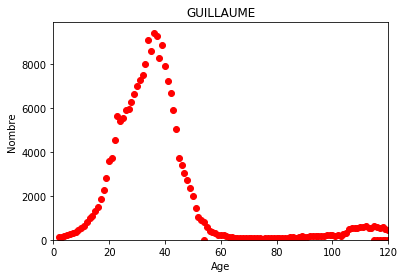

In [95]:

import matplotlib.pyplot as plt

plt.plot(Mon_Prenom_list[0],Mon_Prenom_list[1], 'ro')
plt.axis([0, max(Mon_Prenom_list[0]), 0, max(Mon_Prenom_list[1])+500])
plt.title(Name)
plt.ylabel('Nombre')
plt.xlabel('Age')
plt.show()

#### Calcul de l'age moyen
Reprenons ici le code pour calculer l'age moyen d'un prénom, puis généralisons le pour générer une table.

In [96]:
def somme(liste):
    _somme = 0
    for i in liste:
        _somme = _somme + i
    return _somme

Nb_Prenom=[]

for i in range(len(Mon_Prenom_list[0])):
    Nb_Prenom.append((Mon_Prenom_list[0][i]) * (Mon_Prenom_list[1][i]))

Age_Moyen=somme(Nb_Prenom)/somme(Mon_Prenom_list[1])

print('la moyenne d âge est :',round(Age_Moyen,1),'ans')

la moyenne d âge est : 37.8 ans


In [ ]:
def age_moyen(donnees):
    #-------------------------
    # insérez votre code ici  |
    #-------------------------
    return 
            # Retrournez la valeur de l'age moyen en int

# Synthèse

> - Qu'elles sont les nouvelles fonctions et méthodes que vous avez vu mais qui pourtant ne font pas parti directement à la manipulation des données ?
> > - SET, Gestion de l'erreur, seek(0), break ...
> - L'intérêt des listes est :
> > - Faire des calculs séquenciels, une recherche d'indice
> - L'intérêt des dictionnaire est :
> > - Trouver une valeur
> - 